# 主成分分析

## 讀取檔案

In [3]:
import pandas as pd
import numpy as np

In [4]:
data_org = pd.read_csv("Telecom Customer Churn.csv")     #用的是電信業者的客戶資料
data_org

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [5]:
train_data = data_org.drop(['customerID','Churn','TotalCharges'],axis=1)
train_data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40


Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object')

## 特徵編碼(把不是數字的特徵變成數字)

In [7]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
category = train_data.select_dtypes(exclude=['int','float']).columns
category_list = list(category)
train_data[category_list] = train_data[category_list].apply(lambda col:le.fit_transform(col))
train_data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40


## 數據標準化

In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
train_data_scalered = scaler.fit_transform(train_data)
train_data_scalered_df = pd.DataFrame(train_data_scalered)
train_data_scalered_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,-1.009559,-0.439916,1.034530,-0.654012,-1.277445,-3.054010,0.062723,-1.183234,-0.918838,1.242550,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,0.398558,-1.160323
1,0.990532,-0.439916,-0.966622,-0.654012,0.066327,0.327438,-0.991588,-1.183234,1.407321,-1.029919,1.245111,-0.925262,-1.113495,-1.121405,0.371271,-1.205113,1.334863,-0.259629
2,0.990532,-0.439916,-0.966622,-0.654012,-1.236724,0.327438,-0.991588,-1.183234,1.407321,1.242550,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,1.334863,-0.362660
3,0.990532,-0.439916,-0.966622,-0.654012,0.514251,-3.054010,0.062723,-1.183234,1.407321,-1.029919,1.245111,1.396299,-1.113495,-1.121405,0.371271,-1.205113,-1.474052,-0.746535
4,-1.009559,-0.439916,-0.966622,-0.654012,-1.236724,0.327438,-0.991588,0.172250,-0.918838,-1.029919,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,0.398558,0.197365


array([[-2.15768617, -0.13303649],
       [-1.13568918, -1.36834129],
       [-2.32080152, -0.38695808],
       ...,
       [-1.66033641, -1.22932592],
       [-2.35864071,  1.75543046],
       [ 2.6707048 ,  0.393231  ]])

## 開始做PCA

In [14]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)     #為了要視覺化，所以我們要把特徵降到只剩2個
pca_fit = pca.fit_transform(train_data_scalered)

pca_df = pd.DataFrame(data = pca_fit,columns = ['principal component 1','principal component 2'])
pca_df

,principal component 1,principal component 2
0,-2.157006,-0.132689
1,-1.137109,-1.368586
2,-2.320999,-0.389134
3,0.320605,-1.663192
4,-3.100661,0.403128
...,...,...
7038,2.010489,0.235781
7039,2.847052,1.484340
7040,-1.659735,-1.228753
7041,-2.359469,1.757233


## 視覺化

In [15]:
data_viseal = pd.concat([pca_df,data_org['Churn']],axis=1)
data_viseal

,principal component 1,principal component 2,Churn
0,-2.157006,-0.132689,No
1,-1.137109,-1.368586,No
2,-2.320999,-0.389134,Yes
3,0.320605,-1.663192,No
4,-3.100661,0.403128,Yes
...,...,...,...
7038,2.010489,0.235781,No
7039,2.847052,1.484340,No
7040,-1.659735,-1.228753,No
7041,-2.359469,1.757233,Yes


Yes 1869
No 5174


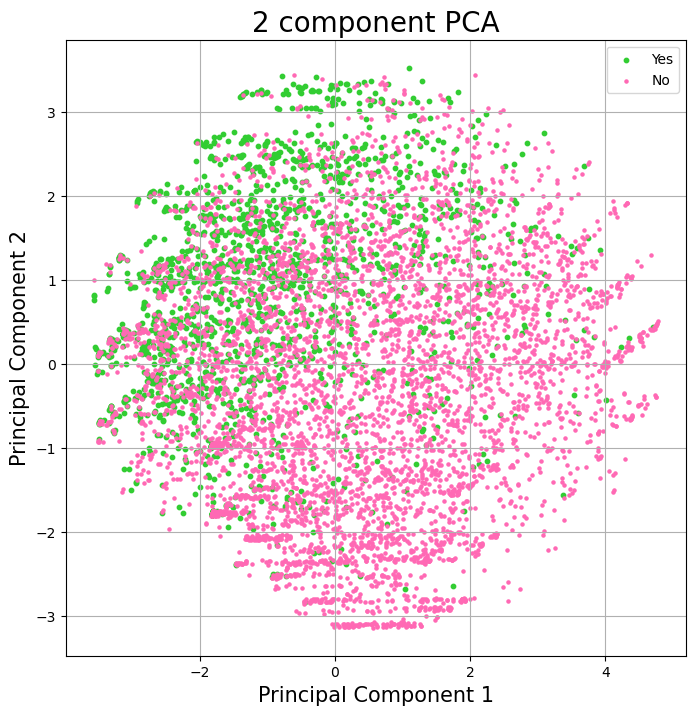

In [16]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Yes','No']
colors = ['limegreen','hotpink']
sizes = [10,5]
for target, color ,size in zip(targets,colors,sizes):
    indicesToKeep = data_viseal['Churn'] == target
    print(target,len(data_viseal.loc[indicesToKeep, 'principal component 1']))     #看看有幾個點是yes or no
    ax.scatter(data_viseal.loc[indicesToKeep, 'principal component 1'],
               data_viseal.loc[indicesToKeep, 'principal component 2'],
               c = color,
               s = size)
ax.legend(targets)
ax.grid()

# K-means

In [26]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [27]:
data_org = pd.read_csv("Telecom Customer Churn.csv")
data = data_org.drop(['customerID','Churn','TotalCharges'],axis=1)
data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40


In [28]:
le = LabelEncoder()
cat_cols=data.select_dtypes(exclude=['int','float']).columns
enc_data=list(cat_cols)
data[enc_data]=data[enc_data].apply(lambda col:le.fit_transform(col))
data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40


In [29]:
scale=StandardScaler()
datas=scale.fit_transform(data)
data_df=pd.DataFrame(datas)
data_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,-1.009559,-0.439916,1.034530,-0.654012,-1.277445,-3.054010,0.062723,-1.183234,-0.918838,1.242550,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,0.398558,-1.160323
1,0.990532,-0.439916,-0.966622,-0.654012,0.066327,0.327438,-0.991588,-1.183234,1.407321,-1.029919,1.245111,-0.925262,-1.113495,-1.121405,0.371271,-1.205113,1.334863,-0.259629
2,0.990532,-0.439916,-0.966622,-0.654012,-1.236724,0.327438,-0.991588,-1.183234,1.407321,1.242550,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,1.334863,-0.362660
3,0.990532,-0.439916,-0.966622,-0.654012,0.514251,-3.054010,0.062723,-1.183234,1.407321,-1.029919,1.245111,1.396299,-1.113495,-1.121405,0.371271,-1.205113,-1.474052,-0.746535
4,-1.009559,-0.439916,-0.966622,-0.654012,-1.236724,0.327438,-0.991588,0.172250,-0.918838,-1.029919,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,0.398558,0.197365
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0.990532,-0.439916,1.034530,1.529024,-0.340876,0.327438,1.117034,-1.183234,1.407321,-1.029919,1.245111,1.396299,1.146547,1.138411,0.371271,0.829798,1.334863,0.665992
7039,-1.009559,-0.439916,1.034530,1.529024,1.613701,0.327438,1.117034,0.172250,-0.918838,1.242550,1.245111,-0.925262,1.146547,1.138411,0.371271,0.829798,-0.537747,1.277533
7040,-1.009559,-0.439916,1.034530,1.529024,-0.870241,-3.054010,0.062723,-1.183234,1.407321,-1.029919,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,0.398558,-1.168632
7041,0.990532,2.273159,1.034530,-0.654012,-1.155283,0.327438,1.117034,0.172250,-0.918838,-1.029919,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,1.334863,0.320338


For n_clusters = 2, silhouette score is 0.42916824120653213)
For n_clusters = 3, silhouette score is 0.4402793124905602)
For n_clusters = 4, silhouette score is 0.46162586820317336)
For n_clusters = 5, silhouette score is 0.44874343141685585)
For n_clusters = 6, silhouette score is 0.4236052614505926)
For n_clusters = 7, silhouette score is 0.4287075509666882)
For n_clusters = 8, silhouette score is 0.4296129311949405)
For n_clusters = 9, silhouette score is 0.4234927524892727)
For n_clusters = 10, silhouette score is 0.4132860559610156)
For n_clusters = 11, silhouette score is 0.4144745925616493)
For n_clusters = 12, silhouette score is 0.4226906541925967)
For n_clusters = 13, silhouette score is 0.41236525617851477)
For n_clusters = 14, silhouette score is 0.4043141007416935)


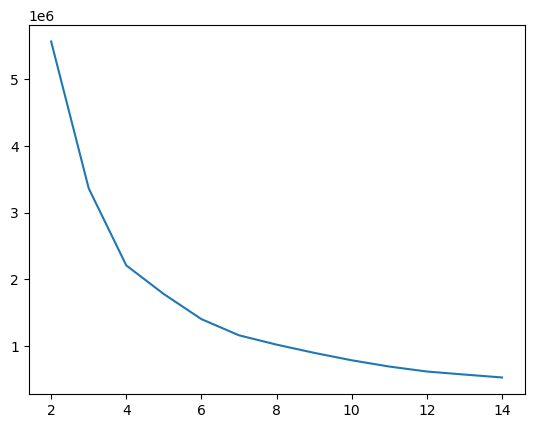

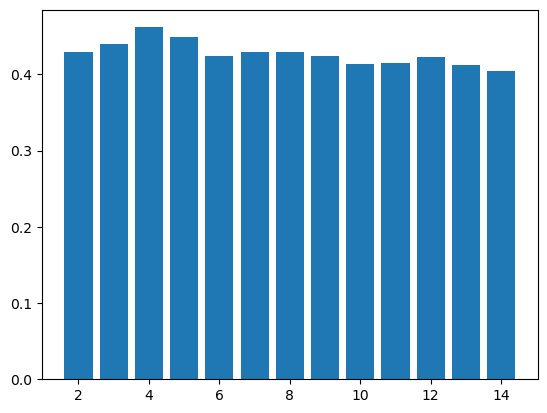

In [30]:
score_list=[]
wcss = []
for n_clusters in range(2,15):
        clusterer = KMeans(n_clusters=n_clusters,init='k-means++',max_iter=300,n_init=10,random_state=0)
        clusterer.fit(data)
        wcss.append(clusterer.inertia_)
        preds = clusterer.predict(data)
        centers = clusterer.cluster_centers_

        score = silhouette_score (data, preds, metric='euclidean')
        #輪廓的取值範圍為[-1, +1]，如果某一樣本的輪廓接近1，則說明樣本聚類結果合理；如果接近-1，則說明其更應該分類到其他群；如果輪廓近似為0，則說明該樣本在兩個簇的邊界上。
        #所有樣本輪廓的均值稱為聚類結果的輪廓係數（Silhouette Coefficiency），是該聚類是否合理、有效的度量。
        score_list.append(score)
        print ("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))
        

plt.plot(range(2,15),wcss)     #觀察分成幾群後距離變化最明顯
plt.show()
plt.bar(range(2,15),score_list)
plt.show()

In [31]:
#從上面我們可以看到，當分成4群時，輪廓分數也最接近1，且wcss分數也在轉折點
model = KMeans(n_clusters = 4,init = 'k-means++',max_iter = 300,n_init = 10,random_state = 0)     #所以我們把群數設定成4群
model.fit(data)
model.labels_

array([0, 2, 0, ..., 0, 3, 1])

In [33]:
#我們要畫出每個點的分群結果，但因為要可視化只能有兩個特徵，所以我們拿剛剛PCA後的結果來可視化，但這不代表這個實驗是先做過PCA，再做KMEANS
target = pd.DataFrame(model.labels_,columns = ['target'])
data = pd.concat([pca_df,target],axis = 1)
data

,principal component 1,principal component 2,target
0,-2.157006,-0.132689,0
1,-1.137109,-1.368586,2
2,-2.320999,-0.389134,0
3,0.320605,-1.663192,2
4,-3.100661,0.403128,3
...,...,...,...
7038,2.010489,0.235781,3
7039,2.847052,1.484340,1
7040,-1.659735,-1.228753,0
7041,-2.359469,1.757233,3


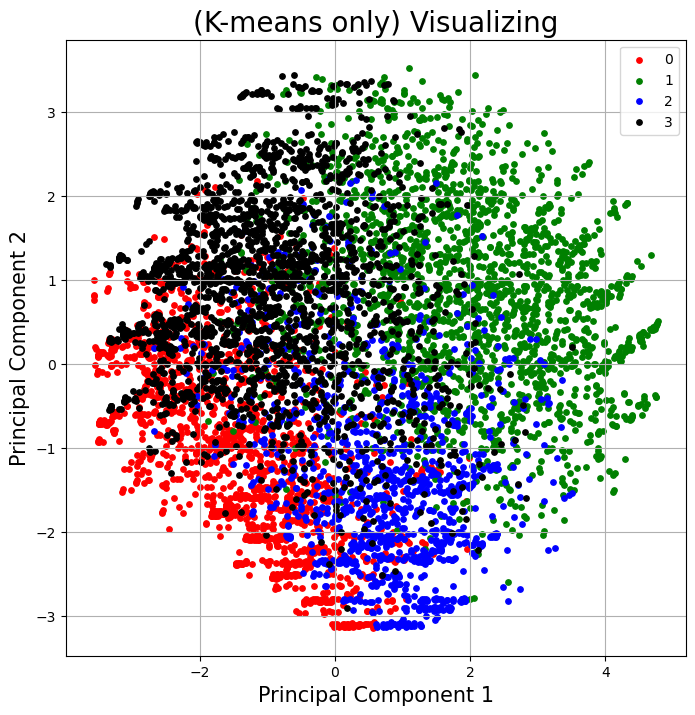

In [34]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('(K-means only) Visualizing', fontsize = 20)
targets = [0,1,2,3]
colors = ['r', 'g', 'b','k']
for target, color in zip(targets,colors):
    indicesToKeep = data['target'] == target
    ax.scatter(data.loc[indicesToKeep, 'principal component 1'],
               data.loc[indicesToKeep, 'principal component 2'],
               c = color,
               s = 15)
ax.legend(targets)
ax.grid()

# 做Kernel PCA + K-Means

### Kernel PCA跟一般PCA相比，Kernel PCA主要再解決有時候PCA沒辦法分割出非線性的圖案(跟K-Means一樣)

## 讀取資料

In [35]:
data_org = pd.read_csv("Telecom Customer Churn.csv")
data = data_org.drop(['customerID','Churn','TotalCharges'],axis=1)
data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40


In [36]:
data_Churn = data_org[['Churn']]
data_Churn

,Churn
0,No
1,No
2,Yes
3,No
4,Yes
...,...
7038,No
7039,No
7040,No
7041,Yes


In [37]:
#做LabelEncoding
le=LabelEncoder()
cat_cols=data.select_dtypes(exclude=['int','float']).columns
enc_data=list(cat_cols)
data[enc_data]=data[enc_data].apply(lambda col:le.fit_transform(col))
data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40


In [38]:
#做StandardScaling
scale=StandardScaler()
datas=scale.fit_transform(data)
data_df=pd.DataFrame(datas)
data_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,-1.009559,-0.439916,1.034530,-0.654012,-1.277445,-3.054010,0.062723,-1.183234,-0.918838,1.242550,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,0.398558,-1.160323
1,0.990532,-0.439916,-0.966622,-0.654012,0.066327,0.327438,-0.991588,-1.183234,1.407321,-1.029919,1.245111,-0.925262,-1.113495,-1.121405,0.371271,-1.205113,1.334863,-0.259629
2,0.990532,-0.439916,-0.966622,-0.654012,-1.236724,0.327438,-0.991588,-1.183234,1.407321,1.242550,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,1.334863,-0.362660
3,0.990532,-0.439916,-0.966622,-0.654012,0.514251,-3.054010,0.062723,-1.183234,1.407321,-1.029919,1.245111,1.396299,-1.113495,-1.121405,0.371271,-1.205113,-1.474052,-0.746535
4,-1.009559,-0.439916,-0.966622,-0.654012,-1.236724,0.327438,-0.991588,0.172250,-0.918838,-1.029919,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,0.398558,0.197365
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0.990532,-0.439916,1.034530,1.529024,-0.340876,0.327438,1.117034,-1.183234,1.407321,-1.029919,1.245111,1.396299,1.146547,1.138411,0.371271,0.829798,1.334863,0.665992
7039,-1.009559,-0.439916,1.034530,1.529024,1.613701,0.327438,1.117034,0.172250,-0.918838,1.242550,1.245111,-0.925262,1.146547,1.138411,0.371271,0.829798,-0.537747,1.277533
7040,-1.009559,-0.439916,1.034530,1.529024,-0.870241,-3.054010,0.062723,-1.183234,1.407321,-1.029919,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,0.398558,-1.168632
7041,0.990532,2.273159,1.034530,-0.654012,-1.155283,0.327438,1.117034,0.172250,-0.918838,-1.029919,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,1.334863,0.320338


In [39]:
datas

array([[-1.00955867, -0.43991649,  1.03453023, ...,  0.8297975 ,
         0.39855772, -1.16032292],
       [ 0.99053183, -0.43991649, -0.96662231, ..., -1.20511329,
         1.33486261, -0.25962894],
       [ 0.99053183, -0.43991649, -0.96662231, ...,  0.8297975 ,
         1.33486261, -0.36266036],
       ...,
       [-1.00955867, -0.43991649,  1.03453023, ...,  0.8297975 ,
         0.39855772, -1.1686319 ],
       [ 0.99053183,  2.27315869,  1.03453023, ...,  0.8297975 ,
         1.33486261,  0.32033821],
       [ 0.99053183, -0.43991649, -0.96662231, ...,  0.8297975 ,
        -1.47405205,  1.35896134]])

## 做Kernel PCA

In [40]:
from sklearn.decomposition import KernelPCA

pca=KernelPCA(n_components=2,kernel='rbf')
pc=pca.fit_transform(data_df)

pdf=pd.DataFrame(data=pc,columns=['principal component 1','principal component 2'])
pdf

,principal component 1,principal component 2
0,0.098201,-0.130983
1,0.148212,0.052317
2,0.284715,-0.076493
3,-0.093819,-0.019683
4,0.556171,-0.191748
...,...,...
7038,-0.272949,-0.066705
7039,-0.402871,-0.140896
7040,0.036609,-0.078873
7041,0.216277,-0.260447


In [41]:
pdf_churn=pd.concat([pdf,data_Churn],axis=1)
pdf_churn

,principal component 1,principal component 2,Churn
0,0.098201,-0.130983,No
1,0.148212,0.052317,No
2,0.284715,-0.076493,Yes
3,-0.093819,-0.019683,No
4,0.556171,-0.191748,Yes
...,...,...,...
7038,-0.272949,-0.066705,No
7039,-0.402871,-0.140896,No
7040,0.036609,-0.078873,No
7041,0.216277,-0.260447,Yes


Yes 1869
No 5174


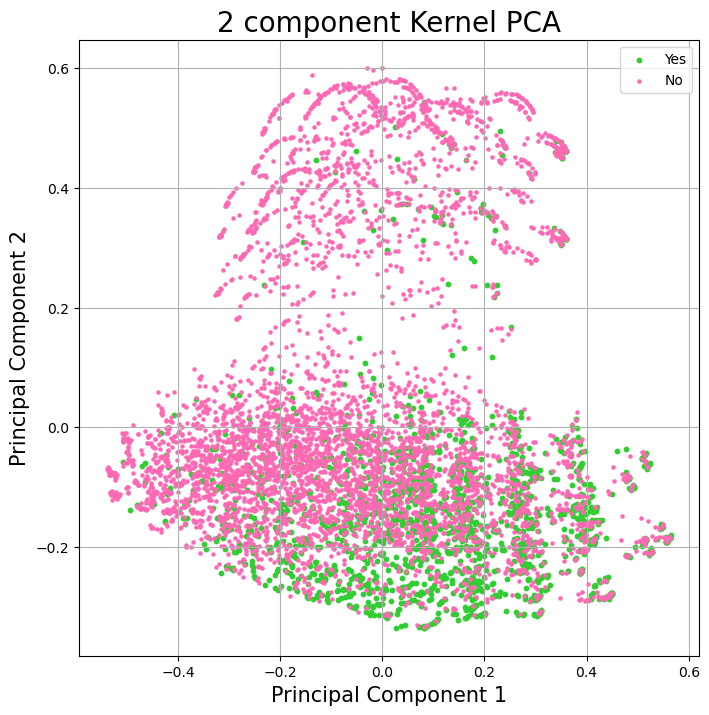

In [42]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component Kernel PCA', fontsize = 20)
targets = ['Yes','No']
colors = ['limegreen','hotpink']
sizes = [10,5]
for target, color ,size in zip(targets,colors,sizes):
    indicesToKeep = pdf_churn['Churn'] == target
    print(target,len(pdf_churn.loc[indicesToKeep, 'principal component 1']))     #看看有幾個點是yes or no
    ax.scatter(pdf_churn.loc[indicesToKeep, 'principal component 1'],
               pdf_churn.loc[indicesToKeep, 'principal component 2'],
               c = color,
               s = size)
ax.legend(targets)
ax.grid()

## 做K-means

For n_clusters = 2, silhouette score is 0.4800938798793384)
For n_clusters = 3, silhouette score is 0.4960931214021162)
For n_clusters = 4, silhouette score is 0.4328823431488023)
For n_clusters = 5, silhouette score is 0.43282877401273334)
For n_clusters = 6, silhouette score is 0.393020144013771)
For n_clusters = 7, silhouette score is 0.39312000808244857)
For n_clusters = 8, silhouette score is 0.37825445036686656)
For n_clusters = 9, silhouette score is 0.36961912232493227)
For n_clusters = 10, silhouette score is 0.37005808520519945)
For n_clusters = 11, silhouette score is 0.3652914991034615)
For n_clusters = 12, silhouette score is 0.3728701839382056)
For n_clusters = 13, silhouette score is 0.3641887695761227)
For n_clusters = 14, silhouette score is 0.36587040842690616)


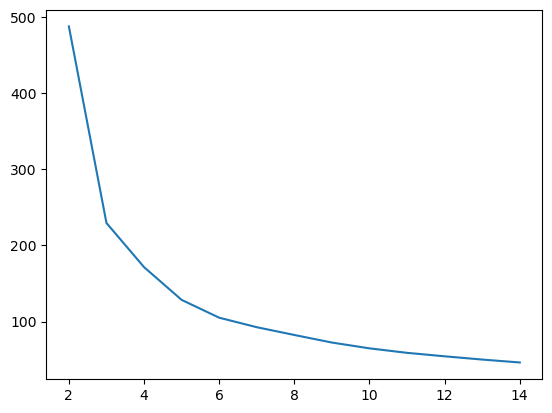

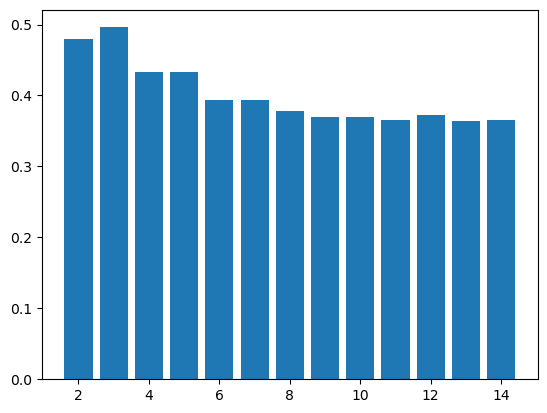

In [43]:
score_list=[]
wcss = []
for n_clusters in range(2,15):
        clusterer = KMeans(n_clusters=n_clusters,init='k-means++',max_iter=300,n_init=10,random_state=0)
        clusterer.fit(pdf)
        wcss.append(clusterer.inertia_)
        preds = clusterer.predict(pdf)
        centers = clusterer.cluster_centers_

        score = silhouette_score (pdf, preds, metric='euclidean')
        #輪廓的取值範圍為[-1, +1]，如果某一樣本的輪廓接近1，則說明樣本聚類結果合理；如果接近-1，則說明其更應該分類到其他群；如果輪廓近似為0，則說明該樣本在兩個簇的邊界上。
        #所有樣本輪廓的均值稱為聚類結果的輪廓係數（Silhouette Coefficiency），是該聚類是否合理、有效的度量。
        score_list.append(score)
        print ("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))
        

plt.plot(range(2,15),wcss)     #觀察分成幾群後距離變化最明顯
plt.show()
plt.bar(range(2,15),score_list)
plt.show()

## 用KPCA過後的數據來做K-MEANS

In [44]:
#從圖上來看，感覺3,4,5群是最好的，輪廓分數最接近1，且wcss分數也在轉折點
model3=KMeans(n_clusters=3,init='k-means++',max_iter=300,n_init=10,random_state=0)     #所以我們把群數設定成3群
model3.fit(pdf)
model3.labels_

array([1, 1, 1, ..., 1, 1, 0])

In [45]:
#我們要畫出每個點的分群結果，這邊的結果就是先做過PCA，再做KMEANS的結果
target=pd.DataFrame(model3.labels_,columns=['target'])
pdf_target=pd.concat([pdf,target],axis=1)
pdf_target

,principal component 1,principal component 2,target
0,0.098201,-0.130983,1
1,0.148212,0.052317,1
2,0.284715,-0.076493,1
3,-0.093819,-0.019683,0
4,0.556171,-0.191748,1
...,...,...,...
7038,-0.272949,-0.066705,0
7039,-0.402871,-0.140896,0
7040,0.036609,-0.078873,1
7041,0.216277,-0.260447,1


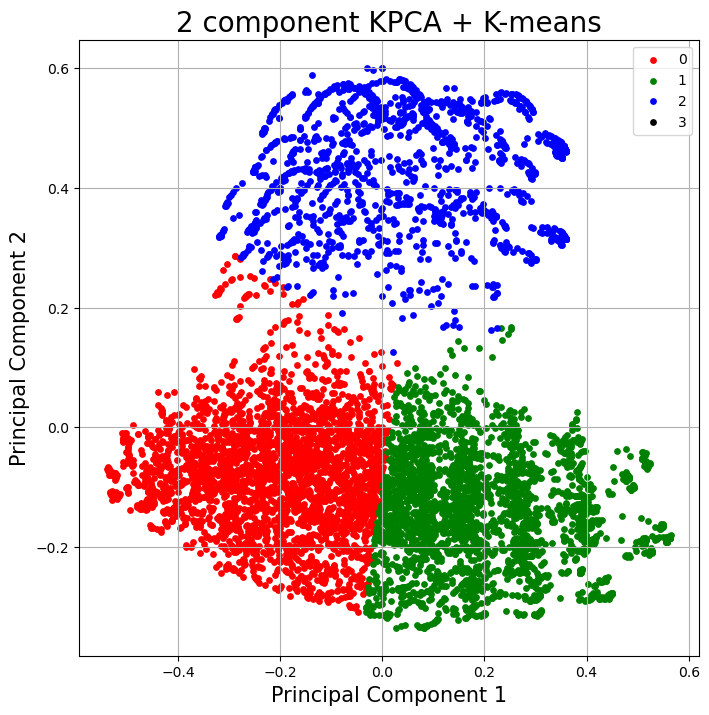

In [46]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component KPCA + K-means', fontsize = 20)
targets = [0,1,2,3]
colors = ['r','g','b','k']
for target, color in zip(targets,colors):
    indicesToKeep = pdf_target['target'] == target
    ax.scatter(pdf_target.loc[indicesToKeep, 'principal component 1'],
               pdf_target.loc[indicesToKeep, 'principal component 2'],
               c = color,
               s = 15)
ax.legend(targets)
ax.grid()


In [47]:
#從圖上來看，感覺3,4,5群是最好的，輪廓分數最接近1，且wcss分數也在轉折點
model4=KMeans(n_clusters=4,init='k-means++',max_iter=300,n_init=10,random_state=0)     #所以我們把群數設定成4群
model4.fit(pdf)
model4.labels_

array([1, 1, 3, ..., 1, 3, 0])

In [48]:
#我們要畫出每個點的分群結果，這邊的結果就是先做過PCA，再做KMEANS的結果
target=pd.DataFrame(model4.labels_,columns=['target'])
pdf_target=pd.concat([pdf,target],axis=1)
pdf_target

,principal component 1,principal component 2,target
0,0.098201,-0.130983,1
1,0.148212,0.052317,1
2,0.284715,-0.076493,3
3,-0.093819,-0.019683,1
4,0.556171,-0.191748,3
...,...,...,...
7038,-0.272949,-0.066705,0
7039,-0.402871,-0.140896,0
7040,0.036609,-0.078873,1
7041,0.216277,-0.260447,3


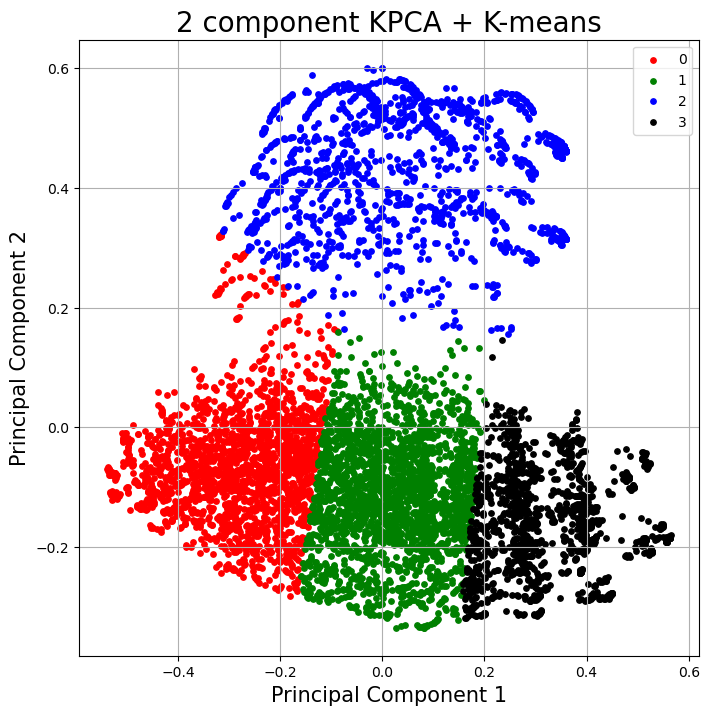

In [49]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component KPCA + K-means', fontsize = 20)
targets = [0,1,2,3]
colors = ['r','g','b','k']
for target, color in zip(targets,colors):
    indicesToKeep = pdf_target['target'] == target
    ax.scatter(pdf_target.loc[indicesToKeep, 'principal component 1'],
               pdf_target.loc[indicesToKeep, 'principal component 2'],
               c = color,
               s = 15)
ax.legend(targets)
ax.grid()

In [50]:
#從圖上來看，感覺3,4,5群是最好的，輪廓分數最接近1，且wcss分數也在轉折點
model5=KMeans(n_clusters=5,init='k-means++',max_iter=300,n_init=10,random_state=0)     #所以我們把群數設定成5群
model5.fit(pdf)
model5.labels_

array([1, 1, 0, ..., 1, 0, 3])

In [51]:
#我們要畫出每個點的分群結果，這邊的結果就是先做過PCA，再做KMEANS的結果
target=pd.DataFrame(model5.labels_,columns=['target'])
pdf_target=pd.concat([pdf,target],axis=1)
pdf_target

,principal component 1,principal component 2,target
0,0.098201,-0.130983,1
1,0.148212,0.052317,1
2,0.284715,-0.076493,0
3,-0.093819,-0.019683,1
4,0.556171,-0.191748,0
...,...,...,...
7038,-0.272949,-0.066705,3
7039,-0.402871,-0.140896,3
7040,0.036609,-0.078873,1
7041,0.216277,-0.260447,0


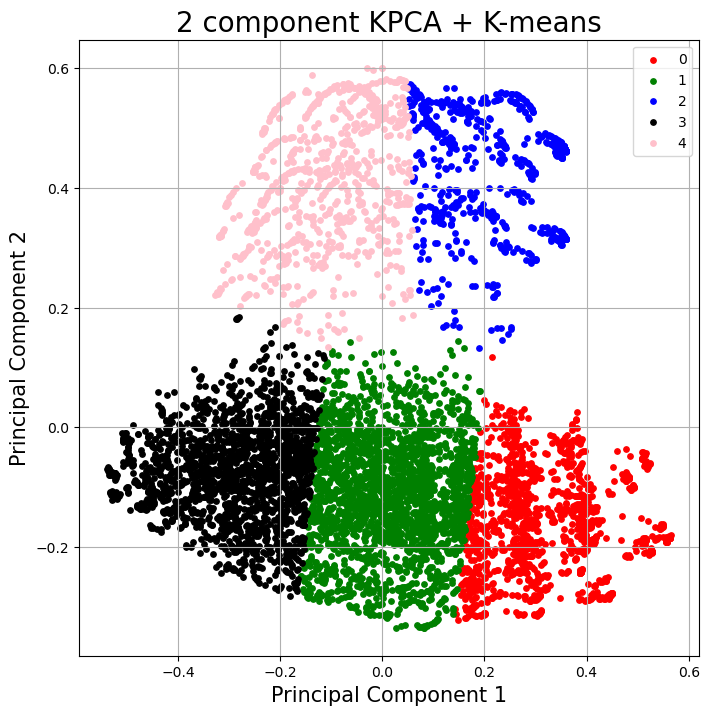

In [52]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component KPCA + K-means', fontsize = 20)
targets = [0,1,2,3,4]
colors = ['r','g','b','k','pink']
for target, color in zip(targets,colors):
    indicesToKeep = pdf_target['target'] == target
    ax.scatter(pdf_target.loc[indicesToKeep, 'principal component 1'],
               pdf_target.loc[indicesToKeep, 'principal component 2'],
               c = color,
               s = 15)
ax.legend(targets)
ax.grid()